In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
directory = 'Training'
directory2 = 'Testing'

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
File=[]
for file in os.listdir(directory):
    File+=[file]
print(File)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [5]:
dataset=[]
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}
count=0

for file in os.listdir(directory):
    path=os.path.join(directory,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(150,150))
        image=img_to_array(image)
        image=image/255.0
        dataset.append([image,count])     
    count=count+1

In [7]:
testset=[]
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}
count=0

for file in os.listdir(directory2):
    path=os.path.join(directory2,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(150,150))
        image=img_to_array(image)
        image=image/255.0
        testset.append([image,count])         
    count=count+1

In [8]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)

In [9]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)
print(data.shape)
print(labels.shape)

(2870, 150, 150, 3)
(2870, 4)


In [10]:
testlabels1=to_categorical(testlabels0)
test=np.array(test)
testlabels=np.array(testlabels1)
print(test.shape)
print(testlabels.shape)

(394, 150, 150, 3)
(394, 4)


In [11]:
data2=data.reshape(-1,150,150,3)
test2=test.reshape(-1,150,150,3)

In [13]:
IMAGE_SIZE = [224, 224]
train_path = 'Training'
valid_path = 'Testing'
dataset=tf.keras.preprocessing.image_dataset_from_directory ("Training",
                                            shuffle=True,
                                           image_size=(IMAGE_SIZE),
                                           batch_size=50
                                           )

Found 2870 files belonging to 4 classes.


In [14]:
class_names= dataset.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

(50, 224, 224, 3)
[3 2 2 1 3 0 1 1 3 0 3 0 3 0 1 3 0 1 0 3 3 0 0 1 1 0 0 1 1 0 1 3 2 0 0 1 1
 0 2 3 3 1 1 2 1 1 3 3 1 3]


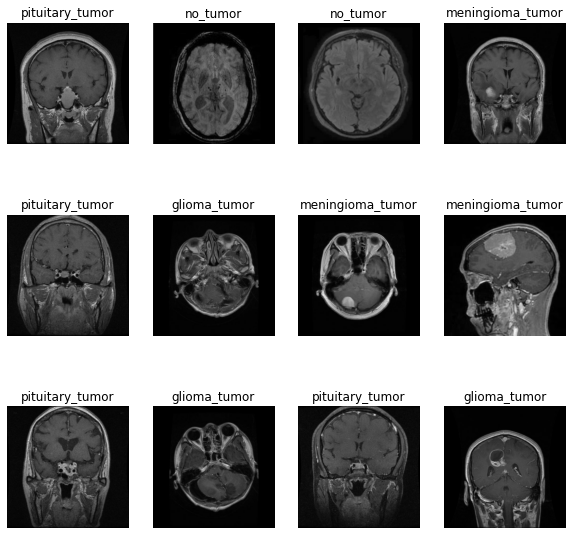

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [16]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [17]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2296, 150, 150, 3)
(574, 150, 150, 3)
(2296, 4)
(574, 4)


In [18]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                    width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

# Using DenseNet 201

In [19]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(150,150,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74842112/74836368 [==============================] - 9s 0us/step


In [20]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(4, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=20)

Epoch 1/20
72/72 [==============================] - 237s 3s/step - loss: 0.8002 - accuracy: 0.6742 - val_loss: 0.5629 - val_accuracy: 0.7892
Epoch 2/20
72/72 [==============================] - 231s 3s/step - loss: 0.5510 - accuracy: 0.7827 - val_loss: 0.4916 - val_accuracy: 0.8206
Epoch 3/20
72/72 [==============================] - 365s 5s/step - loss: 0.4564 - accuracy: 0.8262 - val_loss: 0.6954 - val_accuracy: 0.7613
Epoch 4/20
72/72 [==============================] - 211s 3s/step - loss: 0.4588 - accuracy: 0.8188 - val_loss: 0.5794 - val_accuracy: 0.7840
Epoch 5/20
72/72 [==============================] - 222s 3s/step - loss: 0.4168 - accuracy: 0.8419 - val_loss: 0.5992 - val_accuracy: 0.7787
Epoch 6/20
72/72 [==============================] - 254s 4s/step - loss: 0.4007 - accuracy: 0.8436 - val_loss: 0.4010 - val_accuracy: 0.8606
Epoch 7/20
72/72 [==============================] - 214s 3s/step - loss: 0.4151 - accuracy: 0.8380 - val_loss: 0.5288 - val_accuracy: 0.8066
Epoch 8/20
72

In [98]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       157
           1       0.87      0.67      0.76       170
           2       0.95      0.85      0.90        81
           3       0.73      1.00      0.85       166

    accuracy                           0.84       574
   macro avg       0.87      0.84      0.84       574
weighted avg       0.85      0.84      0.84       574



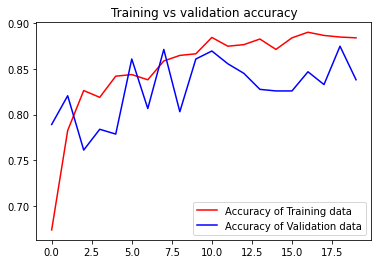

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [99]:
get_acc = history.history['accuracy']
value_acc = history.history['val_accuracy']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()
plt.savefig('Accuracy_acc')

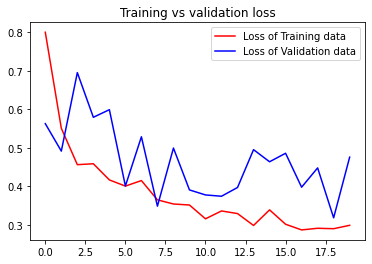

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [100]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()
plt.savefig('Loss_loss')

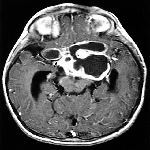

In [101]:
load_img("Testing/glioma_tumor/image(22).jpg",target_size=(150,150))

In [102]:
image=load_img("Testing/glioma_tumor/image(22).jpg",target_size=(150,150))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [103]:
reverse_mapping={0:'no_tumor', 1:'pituitary_tumor', 2:'meningioma_tumor', 3:'glioma_tumor'}

def mapper(value):
    return reverse_mapping[value]

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is glioma_tumor.


In [104]:
target_names=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [105]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))

# Using Efficient net B1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sns.countplot(y_train)


In [ ]:
sns.countplot(y_test)


In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)